## Zdalny dostęp do maszyny obliczeniowej

Bardzo często, **w zasadzie zawsze**, nie mamy dostępu bezpośredniego do maszyny, na której są wykonywane obliczenia.
Środowisko Google Colaboratory (Google Colab) dostarcza dostępu do wirtualnych maszyn gdzieś w cyberprzestrzeni.
Maszyny wirtualne są powoływane do życia dla każdego użytkownika, dlatego etap ``Łączenie`` wymaga makroskopowej ilości czasu.

Rzadko się jednak zdarza, że ośrodki dostarczające mocy obliczeniowej, np. ICM dostarczają też takiego wygodnego środowiska jak Colab. Zwykle użytkownik musi wykonać parę kroków, by mieć analogiczną funkcjonalność:

1) łączenie się z maszyną zdalną,
2) uruchomienie usługi typu *Jupyter Server*,
3) połączenie się z usługą z komputera lokalnego - terminala

## Połączenie z maszyną zdalną

W każdym szanującym się ośrodku komputerowym urządzenia w wewnętrznej sieci komputerowej (Local Area Netowrk, LAN) są odizolowane od sieci rozległej (Wide Area Network, WAN), czyli całego internetu.

Dostęp do sieci LAN uzyskuje się przez komputer dostępowy - `gateway`. W przypadku studentów Wydziału Fizyki jest to komputer
```Bash
tempac.okwf.fuw.edu.pl
```

Po zalogowaniu się na komputer dostępowy można zalogować się dalej na komputer który dostarcza mocy obliczeniowej, np.
komputery z pracowni:
```Bash
pracownia.okwf.fuw.edu.pl
```


**Proszę:**

* zalogować się na komputer `pracownia` bezpośrednio - nie powinno się udać z sieci `FUW.open`
* zalogować się na komputer `tempac`, a potem na komputer `pracownia` 

Instrukcje:

* Linux - należy otworzyć okno terminala
* Windows - aplikacje -> szukaj -> cmd

W oknie terminala należy użyć komendy `ssh`:  
  ```Bash
  ssh login@tempac.okwf.fuw.edu.pl
  ```

i po zalogowaniu na `tempac` jeszcze raz:

  ```Bash
  ssh login@pracownia.okwf.fuw.edu.pl
  ```

Po zalogowaniu się można uruchomić odpowiednią usługę. Oczywiście takie logowanie w dwu krokach jest bardzo niewygodne.
Można je ułatwić używając tunelowania sieciowego. W tym celu trzeba dodać odpowiedni wpis do konfiguracji programu `ssh`
(ta sama lokalizacja na Linux i Windows):
```Bash
.ssh/config
```

Jeśli nie ma takiego pliku w katalogu użytkownika, to należy go stworzyć. W pliku `config` umieszczamy bloki konfigurujące dostęp do zdalnych maszyn. W przypadku pracowni taki blok powinien wyglądać następująco:
```Bash
Host pracownia
     ForwardX11 yes
     ForwardAgent yes
     UserKnownHostsFile ~/.ssh/known_hosts
     Hostname pracownia.okwf.fuw.edu.pl
     LocalForward 8888 localhost:8888
     RequestTTY yes
     ProxyJump YOUR_LOGIN_ON_TEMPAC@tempac.okwf.fuw.edu.pl:22
     #RemoteCommand ./runSingularity.sh
     User YOUR_LOGIN_ON_TEMPAC
```

**Proszę:**

* zmodyfikować swój plik `.ssh/config` i dodać wpis dla komputera `pracownia`
* zalogować się na komputer `pracownia`:
  ```Bash
  
  ssh pracownia
  ```

**Proszę:**

* uruchomić kontener zawierający środowisko przygotowane dla naszych zajęć:
```Shell
~akalinow/Publiczny/UczenieMaszynoweII/ml_lecture
```
* w kontenerze uruchomić serwer jupyter:
```Shell
jupyter lab --no-browser --ip=0.0.0.0 --notebook-dir=$HOME
```
* otworzyć okno Jupyter na lokalnym komputerze używając URL wypisanego w oknie gdzie uruchomiono serwer, np.:
```Shell
http://127.0.0.1:8888/lab?token=e7862a89b9fe602cb31391359f8516376
```

**Uwaga 1:** proszę zwrócić uwagą na adres - trzeba użyć adresu IP lokalnego komputera: `127.0.0.1`.
dostęp przez adres IP lub DNS komputera zdalnego,  ```pd100.odk.fuw.edu.pl``` zadziała jedynie jeśli łączymy się z komputera
w tej samej sieci LAN co komputer ```pd100```, czyli np. sieci wewnętrznej FUW.

**Uwaga 2:** komputery ```pracownia``` nie nadają się do treningu modeli uczenia maszynowego. Kroki powyżej stanowią jedynie trening.

**Uwaga 3:** analogiczny dostęp można uzyskać z wtyczką ```Remote explorer``` do Visual Studio.

Środowisko programistyczne: interpreter Python i potrzebne biblioteki można instalować samodzielne.
Dużo wygodniejszą opcją są kontenery - zestawy oprogramowania, włącznie z systemem operacyjnym, które można uruchomić na dowolnej maszynie
i uzyskać ściśle określone środowisko pracy. Po wstępnej konfiguracji praca z kontenerami jest bardzo łatwa.

# Zadanie domowe 

**Proszę:**

* osoby z laptopami z Windows: o instalację aplikacji [Docker Desktop](https://docs.docker.com/desktop/install/windows-install/)
* osoby z laptopami z Linuksem: o instalację pakietu [Docker Engine](https://docs.docker.com/engine/install/ubuntu)
* po instalacji proszę uruchomić testowy kontener `hello_world`
  (Windows - proszę otworzyć okno powłoki: `power shell` i pominąć komendę `sudo`):
  ```Shell
  sudo docker run hello-world
  ```

Oczekiwany wynik:

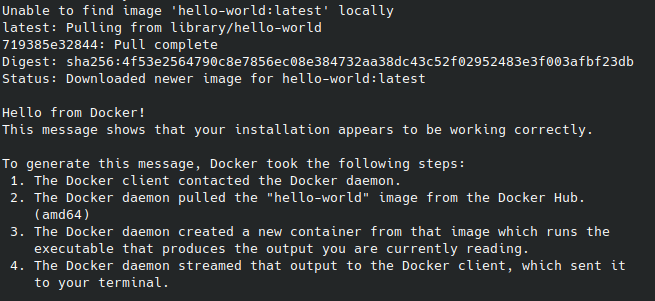

# Kontener przygotowany na zajęcia

Do wykładu został przygotowany kontener zawierający potrzebne pakiety Python oraz server Jupyter. 


**Proszę:**

* pobrać i uruchomić kontener [akalinow/ml_lecture](https://hub.docker.com/repository/docker/akalinow/ml_lecture/general)


Linux:

```
sudo docker run --name ml_lecture --rm -e DISPLAY=$DISPLAY  -v /home/$USER:/scratch -v /tmp/.X11-unix:/tmp/.X11-unix:ro  -w /home/jupyter -p 8888:8888 akalinow/ml_lecture /home/jupyter/start-jupyter.sh
```

Windows:
```
mkdir %USERPROFILE%\Docker
set WORKING_DIR=%USERPROFILE%\Docker
docker pull akalinow/ml_lecture
docker run --name ml_lecture -v %WORKING_DIR%:/scratch -w /home/jupyter -p 8888:8888 akalinow/ml_lecture /home/jupyter/start-jupyter.sh
```

Oczekiwany wynik:

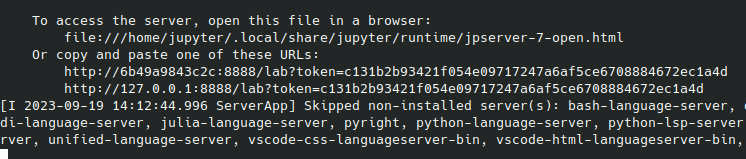

<br></br>

**Uwaga 1:** użycie GPU na lokalnym komputerze wymaga kilku dodatkowych kroków. Zainteresowane osoby proszę o kontakt.

**Uwaga 2:** na maszynach pod Linux polecam użycie [apptainer](https://apptainer.org/get-started) zamiast Dockera. W apptainer można uruchamiać także kontenery zbudowane z Dockerem

**Uwaga 3:** komenda w wersji dla Windows nie ma parametru `--rm` co oznacza że pliki kontenera są zachowane po jego zamknięciu. Komendy `docker run` należy użyć tylko za pierwszym razem. Przy kolejnych sesjach trzeba urucomić kontener wybierając jego nazwę z listy w aplikacji Docker desktop.


**Proszę:**

* otworzyć adres URL serwera Jupyter ze swojej lokalnej maszyny
* pobrać notatnik `01a_Przypomnienie_python.ipynb` na lokalny komputer
* uruchomić wszystkie komórki w notatniku na lokalnym komputerze

Notatniki Jupyter można także uruchamiać w Visual Studio.
Jako jądra wykonawczego można użyć jądra dostarczonego przez kontener:

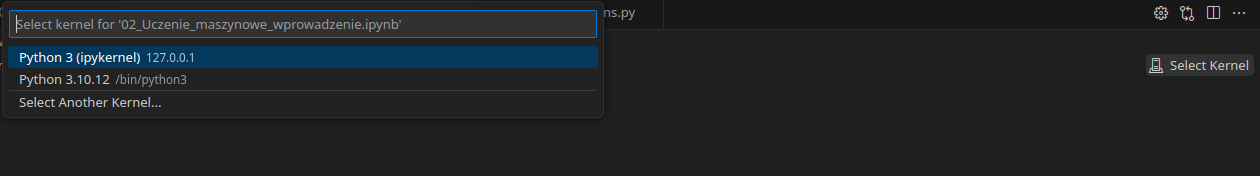

Dzięki temu mamy:

* zalety z używania Visual Studio - duża liczba przydatnych wtyczek, autouzupełniania (`dumb` i `AI`)
* zalety z używania kontenera - uniknięcie ręcznego instalowania wymaganych pakietów

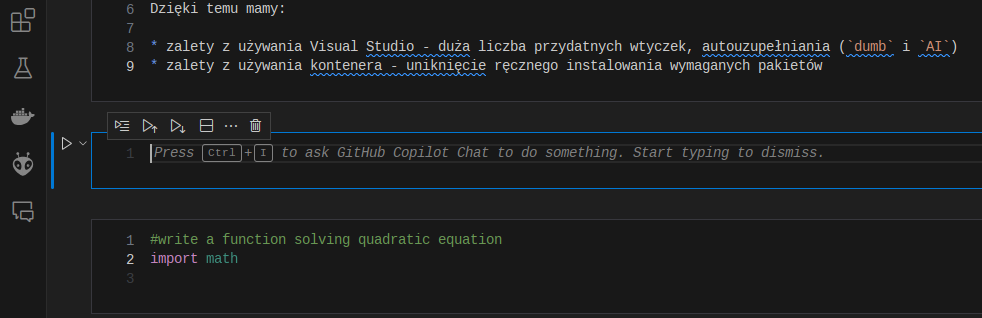